# Build SVM Classifier Models

## Import Processed Data

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# set path of the processed data
processed_data_path = Path.cwd().parent / 'data' / 'processed'
train_processed_file_path = processed_data_path /'train_processed_for_pca.csv'
test_processed_file_path = processed_data_path / 'test_processed_for_pca.csv'
unlabeled_processed_file_path = processed_data_path / 'unlabeled_processed_for_pca.csv'

# create data frames for train, test, and unlabled data
train_df = pd.read_csv(train_processed_file_path, index_col = 'PassengerId')
test_df = pd.read_csv(test_processed_file_path, index_col = 'PassengerId')
unlabeled_df = pd.read_csv(unlabeled_processed_file_path, index_col = 'PassengerId')

In [3]:
# in the train and test data, X contains all the columns except Survived
# y is Survived
X_train = train_df.drop(['Survived'], axis = 1)
y_train = train_df['Survived']
X_test = test_df.drop(['Survived'], axis = 1)
y_test = test_df['Survived']

## PCA

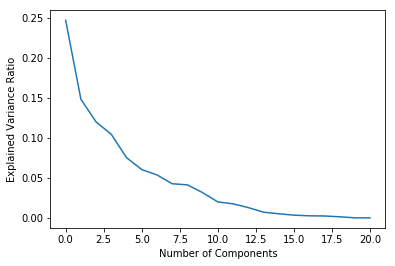

In [4]:
# let's look at how explained variance ratio varies with number of components
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA(random_state = 42)
pca.fit(X_train)

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [5]:
# it looks like we can get away with using about 13 components
pca = PCA(n_components = 13,
          random_state = 42).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
unlabeled_pca = pca.transform(unlabeled_df)

## Default Linear SVM Classifier

In [6]:
from sklearn.svm import LinearSVC

In [7]:
# use 5-fold CV to evaluate accuracy with pca data
model = LinearSVC(random_state = 42)
scores = cross_val_score(model, X_train_pca, y_train, cv = 5)

print('CV accuracty mean: ' + '{0:2f}'.format(scores.mean()))
print('CV accuracty std: ' + '{0:2f}'.format(scores.std()))
print('CV scores:', scores)

CV accuracty mean: 0.800518
CV accuracty std: 0.026058
CV scores: [0.78321678 0.78321678 0.83916084 0.82394366 0.77304965]


## Tuned Linear SVM Classifier

In [8]:
# define the parameter values that will be considered
C_vals = [2**i for i in range(-7,5)]
params = {'C' : C_vals}
# used to evaluate all possible combinations with 5-fold cross-validation
grid_search = GridSearchCV(LinearSVC(random_state = 42),
                           param_grid = params,
                           cv = 5,
                           refit = True,
                           return_train_score = True)

# fit
grid_search.fit(X_train_pca, y_train)

# return the optimal combo of parameters and its score
print(grid_search.best_params_, '\n')
print(grid_search.best_score_)

{'C': 0.0625} 

0.8047752808988764


In [9]:
# use 5-fold CV to evaluate accuracy with pca data
model = LinearSVC(random_state = 42,
                  C = 0.0625)
scores = cross_val_score(model, X_train_pca, y_train, cv = 5)

print('CV accuracty mean: ' + '{0:2f}'.format(scores.mean()))
print('CV accuracty std: ' + '{0:2f}'.format(scores.std()))
print('CV scores:', scores)

CV accuracty mean: 0.804753
CV accuracty std: 0.019736
CV scores: [0.7972028  0.78321678 0.83216783 0.82394366 0.78723404]


## Default RBF Kernel SVM Classifier

In [10]:
from sklearn.svm import SVC

In [11]:
# use 5-fold CV to evaluate accuracy with train data
model = SVC(random_state = 42,
            kernel = 'rbf',
            probability = True)
scores = cross_val_score(model, X_train_pca, y_train, cv = 5)

print('CV accuracty mean: ' + '{0:2f}'.format(scores.mean()))
print('CV accuracty std: ' + '{0:2f}'.format(scores.std()))
print('CV scores:', scores)

CV accuracty mean: 0.807629
CV accuracty std: 0.020646
CV scores: [0.7972028  0.77622378 0.81818182 0.83802817 0.80851064]


## Tuned RBF Kernel SVM Classifier

In [12]:
# define the parameter values that will be considered
C_vals = [2**i for i in range(-5,5)]
gammas = [2**i for i in range(-5,5)]
params = {'C' : C_vals,
          'gamma' : gammas}

# used to evaluate all possible combinations with 5-fold cross-validation
grid_search = GridSearchCV(SVC(random_state = 42,
                               kernel = 'rbf',
                               probability = True),
                           param_grid = params,
                           cv = 5,
                           refit = True,
                           return_train_score = True)

# fit
grid_search.fit(X_train_pca, y_train)

# return the optimal combo of parameters and its score
print(grid_search.best_params_, '\n')
print(grid_search.best_score_)

{'C': 8, 'gamma': 0.125} 

0.8216292134831461


In [13]:
# use 5-fold CV to evaluate accuracy with train data
model = SVC(random_state = 42,
            kernel = 'rbf',
            C = 8,
            gamma = 0.125,
            probability = True)
scores = cross_val_score(model, X_train_pca, y_train, cv = 5)

print('CV accuracty mean: ' + '{0:2f}'.format(scores.mean()))
print('CV accuracty std: ' + '{0:2f}'.format(scores.std()))
print('CV scores:', scores)

CV accuracty mean: 0.821665
CV accuracty std: 0.031687
CV scores: [0.81818182 0.77622378 0.83216783 0.87323944 0.80851064]


## Default Poly Kernel SVM Classifier

In [14]:
# use 5-fold CV to evaluate accuracy with train data
model = SVC(random_state = 42,
            kernel = 'poly',
            probability = True)
scores = cross_val_score(model, X_train_pca, y_train, cv = 5)

print('CV accuracty mean: ' + '{0:2f}'.format(scores.mean()))
print('CV accuracty std: ' + '{0:2f}'.format(scores.std()))
print('CV scores:', scores)

CV accuracty mean: 0.664339
CV accuracty std: 0.003904
CV scores: [0.66433566 0.65734266 0.66433566 0.66901408 0.66666667]


## Tuned Poly Kernel SVM Classifier

In [15]:
# define the parameter values that will be considered
degrees = range(2,7)
C_vals = [2**i for i in range(-5,1)]
gammas = [2**i for i in range(-2,2)]
params = {'degree' : degrees,
          'gamma' : gammas,
          'C' : C_vals}

# used to evaluate all possible combinations with 5-fold cross-validation
grid_search = GridSearchCV(SVC(random_state = 42,
                               kernel = 'poly',
                               probability = True),
                           param_grid = params,
                           cv = 5,
                           refit = True,
                           return_train_score = True)

# fit
grid_search.fit(X_train_pca, y_train)

# return the optimal combo of parameters and its score
print(grid_search.best_params_, '\n')
print(grid_search.best_score_)

{'C': 0.0625, 'degree': 2, 'gamma': 2} 

0.8230337078651685


In [16]:
# use 5-fold CV to evaluate accuracy with train data
model = SVC(random_state = 42,
            degree = 2,
            C = 0.0625,
            gamma = 2,
            kernel = 'poly',
            probability = True)
scores = cross_val_score(model, X_train_pca, y_train, cv = 5)

print('CV accuracty mean: ' + '{0:2f}'.format(scores.mean()))
print('CV accuracty std: ' + '{0:2f}'.format(scores.std()))
print('CV scores:', scores)

CV accuracty mean: 0.823083
CV accuracty std: 0.026842
CV scores: [0.8041958  0.7972028  0.82517483 0.87323944 0.81560284]


## Default Sigmoid Kernel SVM Classifier

In [17]:
# use 5-fold CV to evaluate accuracy with train data
model = SVC(random_state = 42,
            kernel = 'sigmoid',
            probability = True)
scores = cross_val_score(model, X_train_pca, y_train, cv = 5)

print('CV accuracty mean: ' + '{0:2f}'.format(scores.mean()))
print('CV accuracty std: ' + '{0:2f}'.format(scores.std()))
print('CV scores:', scores)

CV accuracty mean: 0.783774
CV accuracty std: 0.021212
CV scores: [0.75524476 0.76223776 0.7972028  0.80985915 0.79432624]


## Tuned Sigmoid Kernel SVM Classifier

In [18]:
# define the parameter values that will be considered
C_vals = [2**i for i in range(-5,5)]
gammas = [2**i for i in range(-5,5)]
params = {'gamma' : gammas,
          'C' : C_vals}

# used to evaluate all possible combinations with 5-fold cross-validation
grid_search = GridSearchCV(SVC(random_state = 42,
                               kernel = 'sigmoid',
                               probability = True),
                           param_grid = params,
                           cv = 5,
                           refit = True,
                           return_train_score = True)

# fit
grid_search.fit(X_train_pca, y_train)

# return the optimal combo of parameters and its score
print(grid_search.best_params_, '\n')
print(grid_search.best_score_)

{'C': 0.03125, 'gamma': 0.25} 

0.800561797752809


In [19]:
# use 5-fold CV to evaluate accuracy with train data
model = SVC(random_state = 42,
            kernel = 'sigmoid',
            C = 0.03125,
            gamma = 0.25,
            probability = True)
scores = cross_val_score(model, X_train_pca, y_train, cv = 5)

print('CV accuracty mean: ' + '{0:2f}'.format(scores.mean()))
print('CV accuracty std: ' + '{0:2f}'.format(scores.std()))
print('CV scores:', scores)

CV accuracty mean: 0.800567
CV accuracty std: 0.024065
CV scores: [0.8041958  0.76223776 0.81818182 0.83098592 0.78723404]


## Kaggle Score: 0.77033

Before we "go live" with the best model (that is, submit its predictions to Kaggle), let's check how it performs on the test data, data that it has never seen and had no influence on its selection:

In [20]:
# fit model to entire train set
model = SVC(random_state = 42,
            degree = 2,
            C = 0.0625,
            gamma = 2,
            kernel = 'poly',
            probability = True).fit(X_train_pca, y_train)

# evaluate accuracy on test set
print('Tuned RBF Kernel SVC Accuracy: ' + '{0:2f}'.format(model.score(X_test_pca, y_test)))

Tuned RBF Kernel SVC Accuracy: 0.815642


In [21]:
# generate predictions
predictions = model.predict(unlabeled_pca)

# create a new data frame with two columns: PassengerId and our predicted values for Survived
submission_df = pd.DataFrame({'PassengerId' : unlabeled_df.index, 'Survived' : predictions})

# write submission to disk...
# first define path
submission_file_path = Path.cwd().parent / 'data' / 'external' / 'poly_svc_with_pca.csv'

# create the .csv file
# index is False since we don't want a third column
submission_df.to_csv(submission_file_path, index = False)

## Model Persistence

In [22]:
# create file path
model_file_path = Path.cwd().parent / 'models' / 'poly_svc_with_pca_model.pkl'

# persist the model
joblib.dump(model, model_file_path);

#### Optional: Check the persisted model

In [23]:
# create file paths
model_file_path = Path.cwd().parent / 'models' / 'poly_svc_with_pca_model.pkl'

# load
model_loaded = joblib.load(model_file_path)

In [24]:
# print the model object description
model_loaded

SVC(C=0.0625, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=2, kernel='poly',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
# calculate the score using the loaded model object
# we should get 0.0.815642, as above
print('Persisted Poly Kernel SVC Accuracy: ' + '{0:2f}'.format(model_loaded.score(X_test_pca, y_test)))

Persisted Poly Kernel SVC Accuracy: 0.815642


## Error Analysis

In [26]:
# imports
from sklearn.model_selection import cross_val_predict

In [27]:
# instead of scoring, get the cross-validated estimates for each image
y_train_pred = cross_val_predict(model, X_train_pca, y_train, cv = 5)

In [28]:
# now let's take a look at the confusion matrix to see
# which actual labels (rows) do not match the predicted label (columns)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

conf_mx = confusion_matrix(y_train, y_train_pred)
print(np.matrix(conf_mx))
print('Precision score: ', precision_score(y_train, y_train_pred))
print('Recall score: ', recall_score(y_train, y_train_pred))
print('F1 score: ', f1_score(y_train, y_train_pred))
print('Area under the ROC curve: ', roc_auc_score(y_train, y_train_pred))

[[406  33]
 [ 93 180]]
Precision score:  0.8450704225352113
Recall score:  0.6593406593406593
F1 score:  0.7407407407407407
Area under the ROC curve:  0.7920849082580289


In [29]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

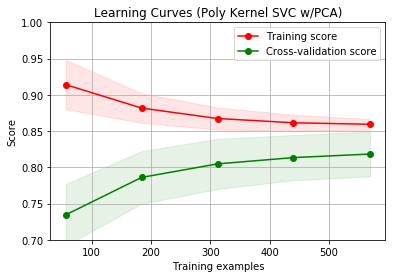

In [30]:
title = "Learning Curves (Poly Kernel SVC w/PCA)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(model, title, X_train_pca, y_train, ylim=(0.7, 1.0), cv=cv, n_jobs=-1);

The Kaggle score improved a bit, but again, overfitting. Let's try Random Forests next.